<a href="https://colab.research.google.com/github/Nikiforosaaa/Nikiforosaaa/blob/main/NAnggitaS_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 5

Name : Nur Anggita Sari

Student ID : 2415011061


## Given

We use this equations:

$$
\begin{cases}
\displaystyle \frac{du}{dt} = \gamma \left(a + \frac{u^2}{1 + v} \right) - u \\\\
\displaystyle \frac{dv}{dt} = b u^2 - v
\end{cases}
$$

With parameters : $ a $ = 0.1, $ b $ = 0.3, $ \gamma $ = 1.0.

Under these conditions, the system has two stable steady states $S_1$ : (0.5, 0
1), $S_3$ : (1.5, 1.0), one saddle point $S_2$ : (1.0, 0.5).

## Question

If the perturbation to $S_1$ is small as shown in the figure, what happens? Please draw the trajectory of solution.

<img src="/Figure.jpg" width="500"/>

## Answer

As we can see from graphic, for near $S_1$, all directions point toward $S_1$. For small perturbation, the trajectory returns to the original steady state $S_1$ (stable), stays inside the basin of attraction of $S_1$.

<img src="/content/download.png" width="500"/>

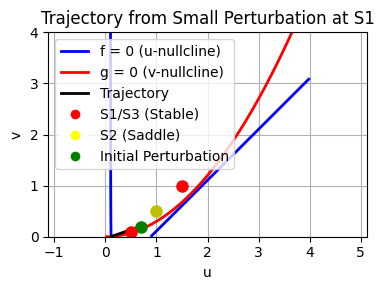

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.lines import Line2D

a = 0.1
b = 0.3
gamma = 1.0

def dydt(t, z):
    u, v = z
    du_dt = gamma * (a + (u**2) / (1 + v)) - u
    dv_dt = b * u**2 - v
    return [du_dt, dv_dt]

u_vals = np.linspace(0, 4, 400)
v_vals = np.linspace(0, 4, 400)
U, V = np.meshgrid(u_vals, v_vals)

f = gamma * (a + (U**2) / (1 + V)) - U  # f(u, v) = 0
g = b * U**2 - V  # g(u, v) = 0

perturbation_small = [0.7, 0.2]
sol = solve_ivp(dydt, [0, 50], perturbation_small, dense_output=True)
t = np.linspace(0, 50, 1000)
u_sol, v_sol = sol.sol(t)

plt.figure(figsize=(4, 3))
null1 = plt.contour(U, V, f, levels=[0], colors='blue', linewidths=2)
null2 = plt.contour(U, V, g, levels=[0], colors='red', linewidths=2)

legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='f = 0 (u-nullcline)'),
    Line2D([0], [0], color='red', lw=2, label='g = 0 (v-nullcline)'),
    Line2D([0], [0], color='black', lw=2, label='Trajectory'),
    Line2D([0], [0], marker='o', color='w', label='S1/S3 (Stable)', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='S2 (Saddle)', markerfacecolor='yellow', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Initial Perturbation', markerfacecolor='green', markersize=8)
]

plt.plot(u_sol, v_sol, 'k-', lw=2, label="Trajectory from small perturbation")
plt.plot(perturbation_small[0], perturbation_small[1], 'go', markersize=8, label="Initial Perturbation")
plt.plot(0.5, 0.1, 'ro', markersize=8, label="S1 (Stable)")
plt.plot(1.5, 1.0, 'ro', markersize=8)
plt.plot(1.0, 0.5, 'yo', markersize=8, label="S2 (Saddle)")

plt.xlabel("u")
plt.ylabel("v")
plt.title("Trajectory from Small Perturbation at S1")
plt.legend(handles=legend_elements, loc='upper left')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()